# 신경망 알고리즘의 진행
## 텐서 플로우 API로 변환
1. 텐서 변환
2. 덧셈,relu,matmul같은 텐서 연산
3. 손실함수 계산을 위한 역전파를 구현한 gradient를 계산(가중치 조정)

## 케라스 API로 변환
1. 모델을 구성하는 Dense 구성
2. 학습에 사용하는 loss함수
3. 학습 진행 방법을 결정하는 optimizer
4. 모델의 성능을 평가하는 metrics
5. 확률적 경사하강법을 수행하는 SGD

## 텐서 생성

In [1]:
import tensorflow as tf
x=tf.ones(shape=(2,1)) # np.ones(shape=(2,1))과 동일

In [2]:
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [4]:
x=tf.zeros(shape=(2,1))

In [6]:
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


### 랜덤 텐서 생성

In [9]:
x=tf.random.normal(shape=(3,1),mean=0,stddev=1) # 정규분포에서 랜덤생성

In [10]:
print(x)

tf.Tensor(
[[-0.7077312 ]
 [ 0.16313788]
 [ 0.86810964]], shape=(3, 1), dtype=float32)


In [12]:
x[0]=1

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

기본적으로 텐서는 생성할때 상수로 생성되고, 넘파이배열같은 방법으로 값을 지정할 수 없음(변수x)

### 텐서 변수로 생성

In [15]:
y=tf.Variable(initial_value=tf.random.normal(shape=(3,1)))

In [16]:
print(y)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.30057544],
       [-0.5698945 ],
       [-0.6295381 ]], dtype=float32)>


In [17]:
# 텐서에 값을 할당하는 방법
y[0,0].assign(0.5)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[ 0.5      ],
       [-0.5698945],
       [-0.6295381]], dtype=float32)>

In [18]:
# 텐서에 연산하는 방법
y.assign_add(tf.ones((3,1)))
print(y)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.5       ],
       [0.4301055 ],
       [0.37046188]], dtype=float32)>


#### 기본적인 수학연산


In [21]:
a=tf.random.normal(shape=(3,3))
b=tf.random.normal(shape=(3,3))
print(a)
print(b)

tf.Tensor(
[[ 0.5352852  -1.2490593   2.1130588 ]
 [ 0.8559575   0.11787648 -0.34852406]
 [-0.31102204 -0.9022857   0.7610746 ]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[ 0.2848454  -0.10333935 -0.29655352]
 [ 0.33051363  0.5846332  -0.5860486 ]
 [-0.0518723   0.79119664  0.20472252]], shape=(3, 3), dtype=float32)


In [22]:
# 제곱
tf.square(a)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.28653023, 1.5601492 , 4.4650173 ],
       [0.7326633 , 0.01389486, 0.12146902],
       [0.09673471, 0.81411946, 0.57923454]], dtype=float32)>

In [23]:
# 제곱근
tf.sqrt(a)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.7316319 ,        nan, 1.4536364 ],
       [0.9251797 , 0.34333143,        nan],
       [       nan,        nan, 0.8723959 ]], dtype=float32)>

In [24]:
# 덧셈
a+b

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.8201306 , -1.3523986 ,  1.8165053 ],
       [ 1.1864711 ,  0.70250964, -0.9345727 ],
       [-0.36289436, -0.11108905,  0.9657971 ]], dtype=float32)>

In [25]:
# 점곱 dot함수와 동일
tf.matmul(a,b)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-0.36996683,  0.88628745,  1.0058595 ],
       [ 0.3008541 , -0.29529068, -0.3942693 ],
       [-0.4262896 ,  0.10679432,  0.77682704]], dtype=float32)>

In [26]:
# 원소별 단순 곱
a*b

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.15247352,  0.12907699, -0.626635  ],
       [ 0.2829056 ,  0.0689145 ,  0.20425203],
       [ 0.01613343, -0.7138854 ,  0.15580912]], dtype=float32)>

## 텐서 플로우로 선형 분류기 구현

In [28]:
import numpy as np

In [29]:
n_samples=np.random.multivariate_normal(
mean=[0,3],
cov=[[1,0.5],[0.5,1]],
size=1000)

In [30]:
k_samples=np.random.multivariate_normal(
mean=[3,0],
cov=[[1,0.5],[0.5,1]],
size=1000)

In [48]:
data=np.vstack((n_samples,k_samples)).astype('float32')

In [49]:
target=np.vstack((np.zeros((1000,1),dtype='float32'),np.ones((1000,1),dtype='float32')))

In [50]:
data

array([[ 0.6880112 ,  2.9281983 ],
       [ 3.1391196 ,  3.118708  ],
       [-0.19391073,  2.4064765 ],
       ...,
       [ 2.5674143 ,  0.7763778 ],
       [ 1.0594518 , -0.7805285 ],
       [ 2.1623924 , -1.1752537 ]], dtype=float32)

In [51]:
target

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

### 랜덤으로 생성한 데이터 셋의 두 클래스

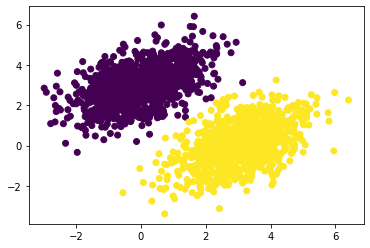

In [52]:
import matplotlib.pyplot as plt
plt.scatter(data[:,0],data[:,1],c=target[:,0])

In [68]:
# 선형 분류 변수 생성
# predict=W*input+b
input_d=2
output_d=1
W=tf.Variable(initial_value=tf.random.uniform(shape=(input_d,output_d)))
b=tf.Variable(initial_value=tf.zeros(shape=(output_d,)))

In [69]:
data.shape

(2000, 2)

In [70]:
W.shape

TensorShape([2, 1])

In [71]:
def model(x):
    mat=tf.matmul(x,W)
    return mat+b 

In [72]:
model(data)

<tf.Tensor: shape=(2000, 1), dtype=float32, numpy=
array([[2.237947 ],
       [3.8395953],
       [1.3797435],
       ...,
       [2.0364938],
       [0.1554906],
       [0.5773049]], dtype=float32)>

In [73]:
# mse 함수
def mes(x,y):# x는 타겟값 y는 예측값
    loss=tf.square(x-y)
    return tf.reduce_mean(loss) # 각 손실값들의 평균

In [74]:
# W와 b를 업데이트하는 함수
l_r=0.1
def train(input,target):
    with tf.GradientTape() as tape:
        pred=model(input)
        loss=mes(target,pred)
    loss_W,loss_b=tape.gradient(loss,[W,b])
    W.assign_sub(loss_W*l_r)
    b.assign_sub(loss_b*l_r)
    return loss

In [77]:
for i in range(40):
    loss=train(data,target)
    print(f'{i+1}번째 스텝의 손실:{loss:.4f}')

1번째 스텝의 손실:0.0283
2번째 스텝의 손실:0.0280
3번째 스텝의 손실:0.0277
4번째 스텝의 손실:0.0275
5번째 스텝의 손실:0.0273
6번째 스텝의 손실:0.0271
7번째 스텝의 손실:0.0269
8번째 스텝의 손실:0.0267
9번째 스텝의 손실:0.0266
10번째 스텝의 손실:0.0264
11번째 스텝의 손실:0.0263
12번째 스텝의 손실:0.0262
13번째 스텝의 손실:0.0261
14번째 스텝의 손실:0.0260
15번째 스텝의 손실:0.0259
16번째 스텝의 손실:0.0258
17번째 스텝의 손실:0.0257
18번째 스텝의 손실:0.0257
19번째 스텝의 손실:0.0256
20번째 스텝의 손실:0.0255
21번째 스텝의 손실:0.0255
22번째 스텝의 손실:0.0254
23번째 스텝의 손실:0.0254
24번째 스텝의 손실:0.0254
25번째 스텝의 손실:0.0253
26번째 스텝의 손실:0.0253
27번째 스텝의 손실:0.0253
28번째 스텝의 손실:0.0252
29번째 스텝의 손실:0.0252
30번째 스텝의 손실:0.0252
31번째 스텝의 손실:0.0252
32번째 스텝의 손실:0.0251
33번째 스텝의 손실:0.0251
34번째 스텝의 손실:0.0251
35번째 스텝의 손실:0.0251
36번째 스텝의 손실:0.0251
37번째 스텝의 손실:0.0251
38번째 스텝의 손실:0.0251
39번째 스텝의 손실:0.0250
40번째 스텝의 손실:0.0250


In [78]:
pred=model(data)

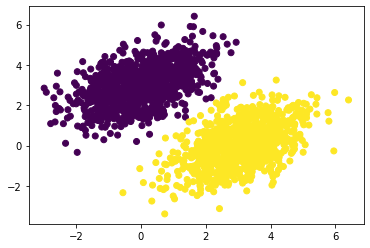

In [82]:
plt.scatter(data[:,0],data[:,1],c=pred[:,0]>0.5)

예측값이 0.5보다 크면 1,0.5보다 작으면 0으로 분류

### 최종 선형 분류 직선의 결과

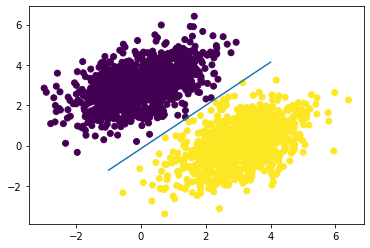

In [84]:
x=np.linspace(-1,4,100)
y=-W[0]/W[1]*x+(0.5-b)/W[1] # W1*x+W2*y+b를 y를 기준으로 정리한 방정식
plt.plot(x,y)
plt.scatter(data[:,0],data[:,1],c=pred[:,0]>0.5)